In [9]:
from player import Player
from dealer import Dealer
from table import Table
from utils import card_value
from tqdm import trange
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def simulate_many_shoes(table, num_shoes=200):
    """
    Simulate many shoes and track bankroll history for each player.
    
    Parameters:
        table (Table): Initialized Table instance.
        num_shoes (int): Number of full shoes to simulate.
    """
    for _ in trange(num_shoes):
        table.play_shoe()
        for player in table.plist:
            player.bankroll_history.append(player.bankroll)

def analyze_blackjack_strategy(
    table_factory,
    starting_bankroll=1000,
    num_shoes=100,
    num_trials=1000
):
    """
    Run many long-run blackjack trials and estimate risk of ruin and EV per round.
    
    Ruin is defined as *any* point where the bankroll drops below 0 during the run.

    Parameters:
        table_factory (callable): Function that returns a fresh Table object
        starting_bankroll (float): Initial player bankroll
        num_shoes (int): Number of shoes per trial
        num_trials (int): Number of trials to average over
    """
    total_final_bankrolls = []
    total_hands_played = []
    num_ruins = 0

    for _ in trange(num_trials, desc="Simulating"):
        table = table_factory()
        for player in table.plist:
            player.bankroll = starting_bankroll
            player.bankroll_history = [starting_bankroll]
            player.hands_played = 0

        simulate_many_shoes(table, num_shoes)

        player = table.plist[0]  # assume one player
        final_bankroll = player.bankroll
        ruin_occurred = any(b < 0 for b in player.bankroll_history)

        total_final_bankrolls.append(final_bankroll)
        total_hands_played.append(player.hands_played)
        if ruin_occurred:
            num_ruins += 1

    avg_final = sum(total_final_bankrolls) / num_trials
    avg_hands = sum(total_hands_played) / num_trials
    ev_per_hand = (avg_final - starting_bankroll) / avg_hands
    risk_of_ruin = num_ruins / num_trials

    print(f"After {num_trials} trials of {num_shoes} shoes each:")
    print(f"  → Average final bankroll: ${avg_final:.2f}")
    print(f"  → Average hands played: {avg_hands:.1f}")
    print(f"  → Expected value per hand: ${ev_per_hand:.4f}")
    print(f"  → Risk of ruin (bankroll went negative): {risk_of_ruin:.2%}")


def table_factory():
    dealer = Dealer()
    players = [Player()]
    return Table(dealer, players, printout=False)



In [11]:
#main loop to play one whole shoe
output = False
p1 = Player()
d1 = Dealer(num_decks_in_shoe=8, printout=output)
plist = [p1]

table = Table(d1, plist, printout=output)

for player in table.plist:
    player.bankroll = 5000.0  # or your starting bankroll
    player.bankroll_history = [player.bankroll]
    player.hands_played = 0

    

In [12]:
# table.play_shoe()
simulate_many_shoes(table, num_shoes=10000)

100%|██████████| 10000/10000 [00:20<00:00, 497.18it/s]


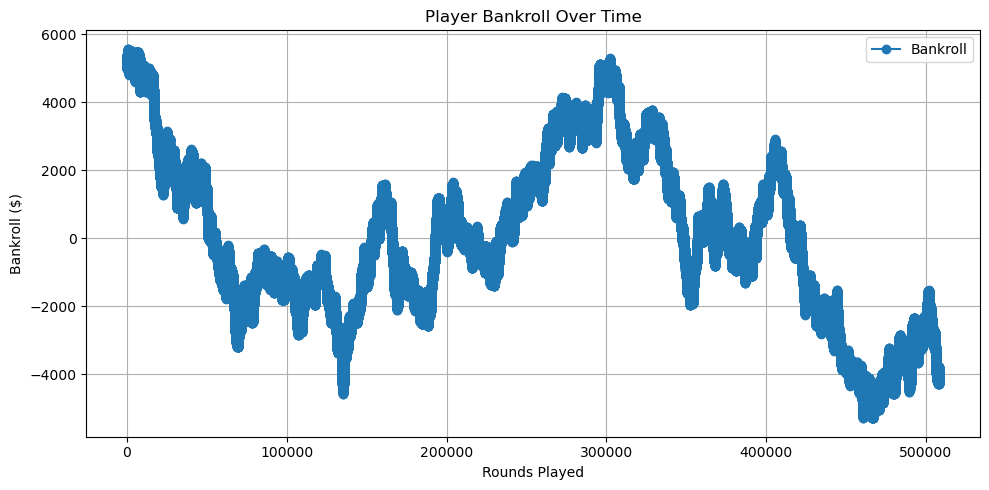

In [13]:
player = table.plist[0]  # or loop over all players if needed

plt.figure(figsize=(10, 5))
plt.plot(range(len(player.bankroll_history)), player.bankroll_history, marker='o', label='Bankroll')
plt.xlabel("Rounds Played")
plt.ylabel("Bankroll ($)")
plt.title("Player Bankroll Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


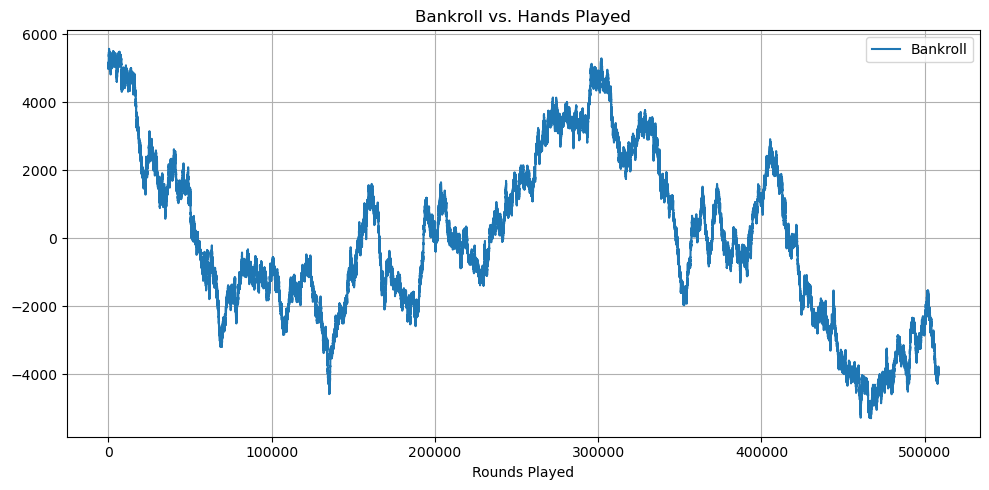

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(player.bankroll_history)), player.bankroll_history, label='Bankroll')
# plt.plot(
#     range(len(player.bankroll_history)),
#     np.cumsum([len(player.hands) for _ in player.bankroll_history]),  # rough hands tracker
#     label='Total Hands Played',
#     linestyle='--'
# )
plt.xlabel("Rounds Played")
plt.title("Bankroll vs. Hands Played")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
analyze_blackjack_strategy(table_factory, num_shoes=100, num_trials=500)


Simulating: 100%|██████████| 500/500 [01:49<00:00,  4.55it/s]

After 500 trials of 100 shoes each:
  → Average final bankroll: $935.99
  → Average hands played: 5173.1
  → Expected value per hand: $-0.0124
  → Risk of ruin (bankroll went negative): 29.80%
